# Inciso A) Uso de la red VGG16 y características extraidas

In [ ]:
#Image Captioning
#Se detectan caracteristicas de una imagen y con ellas se produce una descripcion coherente
#USamos VGG16 que maneja 1000 clases de la base de datos ImageNet
#Como datos de entrada tiene la imagen junto con una secuencia de palabras de la descripcion y como salida la siguiente palabra de esa secuencia
#Usamos el parametro BLEU como medida de coherencia para el texto producido

In [ ]:
# Declaración de librerías para la interpretación de la red para análisis de imágenes
from os import listdir
from pickle import dump
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.models import Model

In [ ]:
# Leemos los nombres (IDs) de todas las imagenes que tenemos, aun no estamos leyendo las imagenes
# Cargadas en la carpeta de 'Flicker8k_Dataset'
#'Flicker8k_Dataset' es una bse de datos de 8092 imagenes jpg con un archivo de descripciones
#cuyo formato empieza con el id de la imagen y luego su descripcion
# https://machinelearningmastery.com/develop-a-deep-learning-caption-generation-model-in-python/

# Este metodo lee los nombres de archivos contenidos en un directorio, les quita la extension jpg y  los guarda en una lista
Image_IDs = [] 
for name in listdir('D:\Documentos\Lenguaje natural\Flicker8k_Dataset'):
        # Agregamos el nombre a la lista quitando la extencion jpg para qeudarnos con el ID
        Image_IDs.append(name.replace('.jpg', ''))

In [ ]:
# Por cada una de las imágenes que están en el archivo, obtenemos
# sus descripciones y las agregamos a un nuevo DataFrame

import pandas as pd

# Leemos el archivo .csv con las descripciones, en el caso de usar el ingles usar Flicker8k_zip que son las descripicones
df = pd.read_csv('D:\Documentos\Lenguaje natural\Archivos_Procesados_Descriptores\\traducciones.csv')

#Si id de la imagen coincide con un id en Image_IDs entonces agregalo. Estamos emparejando un archivo de texto con una imagen
Image_Description = []
for ID, Descripcion in zip(df['Clave'], df['Texto_Español']):
    if ID.split('.')[0] in Image_IDs:#Corta a partir del punto y toma la primera parte,  para obtener solo el id de la imagen
        Image_Description.append(ID.split('.')[0] + ' ' + Descripcion)#Hay muchas descripciones para una misma imagen id por eso las juntamos

In [ ]:
# Cargar el modelo de red preentrenada.vgg16
# https://neurohive.io/en/popular-networks/vgg16/
model = VGG16()
# Reestructurar el modelo (Quitar la última capa para ensamblar la red LSTM¡)
model.layers.pop()
model = Model(inputs=model.inputs, outputs=model.layers[-1].output)
# Imprimir el resumen de las capas contenidas en el modelo
print(model.summary())
# Generamos un diccionario vacío en el que se gregarán las 
# características de cada imagen analizada
features = dict()

In [ ]:
from IPython.display import clear_output

# Generamos un archivo con el mapa de características resultantes para cada
# imagen tomadas de la predicción de la red preentrenada VGG16
directory = 'D:\Documentos\Lenguaje natural\Flicker8k_Dataset'
features = dict()

x = 0
for name in Image_Description:
    if name.split()[0] not in list(features.keys()): #Parte apartir del primer espacio en blanco, para obtener el id que ahora sera name
        x += 1
        clear_output(wait = True)
        print('Trabajando imagen: ' + str(x) + '/' + str(len(Image_IDs)))
        # Cargamos la imagen jpg de un archivo que esta en un directorio a partir de un valor en la lista Image_description
        filename = directory + '/' + name.split()[0] + '.jpg'
        image = load_img(filename, target_size=(224, 224))
        # Convertimos los valores de pixeles de la imagen en un arreglo de numpy
        image = img_to_array(image)
        # Reescalamos los valores de la imagen (Valores para RGB), combinamos los valores en un solo valor
        image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
        # Preprocesamos la entrada para poder utilizarla en el modelo VGG
        image = preprocess_input(image)
        # Obtenemos las características de la imagen (Con predict)
        feature = model.predict(image, verbose=2)
        #print('Feature: ' + str(x) + '/' + str(feature))
        # Almacenamos la característica obtenida del modelo anterior
        features[name.split()[0]] = feature

# Imprimimos las características extraidas, y también las
# guardamos en un archivo
print('Extracted Features: %d' % len(features))
# Guardar los valores de características en un archivo
dump(features, open('features_Espanol_V2.pkl', 'wb'))

## Inciso B) Almacenar las descripciones en el idioma español

In [7]:
#Pasamos de una lista a un diccionario
# Extraemos la descripción de cada imagen
Diccionario_Descripciones = dict()

for Description in Image_Description:
    # Obtenemos solo el ID de la imagen
    Id = Description.split()[0]
    # Obtenemos solo la parte de la descripcion que esta en la parte 1 del split
    Text_Description = Description.split()[1]
    # Obtenemos los tokens a partir de espacios en blanco
    tokens = Text_Description.split()
    # Si el ID de la imagen no está en el diccionario, lo agregamos primero como key y una lista vacia donde agregaremos las descripciones
    if Id not in Diccionario_Descripciones:
        Diccionario_Descripciones[Id] = list()
    # Almacenamos la descripción en su ID correspondiente puesto que hay varias descripciones por imagen
    Diccionario_Descripciones[Id].append(Description)
    
Global_descriptions = Diccionario_Descripciones

print('Total de mágenes: ' + str(len(Diccionario_Descripciones)))
print('Total de descripciones: ' + str(len(Image_Description)))

Total de mágenes: 8091
Total de descripciones: 40455


1000268201_693b08cb0e


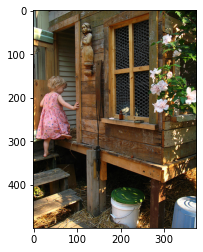

['un niño en un vestido rosa está subiendo por una escalera en una puerta de entrada', 'una niña de entrar en un edificio de madera', 'una pequeña muchacha que sube en una casa de juegos de madera', 'una niña que sube las escaleras su teatro', 'una niña en un vestido rosa de entrar en una cabina de madera']


In [17]:
# Verificamos que la información sea correcta
# (Que las imágeens estén bien asociadas a sus descripciones)
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

for Id in Image_IDs[:1]:
    #Verificar datos imprimiendo cada imagen y su correspondiente
    # set de descripciones (Buscar imshow y imread)
    print(Id)
    img = mpimg.imread('D:\Documentos\Lenguaje natural\Flicker8k_Dataset/' + Id + '.jpg')
    imgplot = plt.imshow(img)
    plt.show()
    print(Diccionario_Descripciones[Id])

In [18]:
#Limpiamos texto sin spacy
import string
Clean_Global_descriptions = Global_descriptions
# Creamos una tabla para remoción de signos de puntuación
table = str.maketrans('', '', string.punctuation)
for key, desc_list in Global_descriptions.items():
    for i in range(len(desc_list)):
        desc = desc_list[i]
        # Tokenización sin spacy, es una lista solo en base a espacios
        desc = desc.split()
        # Convertimos todo a minúsculas
        desc = [word.lower() for word in desc]
        # Removemos signos de puntuación usando el metodo str.maketrans
        desc = [w.translate(table) for w in desc]
        # Conservar tokens a partir de 2 caracteres
        desc = [word for word in desc if len(word)>1]
        # Remover tokens que tienen números en ellos (Función para detectar solo números)
        desc = [word for word in desc if word.isalpha()]
        # Convertir nuevamente el texto en String (Destokenizar en este contexto qeu ya no sea una lista) y lo guardamos en un nuevo diccionario
        Clean_Global_descriptions[key][i] = ' '.join(desc)

In [19]:
# Descripciones limpias en el diccionario
for key in Clean_Global_descriptions.keys():
    for text in Clean_Global_descriptions[key]:
        print(key + ' ' + text)

1000268201_693b08cb0e un niño en un vestido rosa está subiendo por una escalera en una puerta de entrada
1000268201_693b08cb0e una niña de entrar en un edificio de madera
1000268201_693b08cb0e una pequeña muchacha que sube en una casa de juegos de madera
1000268201_693b08cb0e una niña que sube las escaleras su teatro
1000268201_693b08cb0e una niña en un vestido rosa de entrar en una cabina de madera
1001773457_577c3a7d70 un perro negro un perro manchado están luchando
1001773457_577c3a7d70 un perro negro un perro jugando tricolor con los demás en el camino
1001773457_577c3a7d70 un perro negro un perro blanco con manchas marrones están mirando el uno al otro en la calle
1001773457_577c3a7d70 dos perros de diferentes razas que buscan el uno al otro en la carretera
1001773457_577c3a7d70 dos perros en la acera en movimiento uno hacia el otro
1002674143_1b742ab4b8 una niña cubierta de pintura se sienta delante de un arco iris pintado con sus manos en un recipiente
1002674143_1b742ab4b8 una 

1418019748_51c7d59c11 un hombre mayor en una gorra de béisbol
1418019748_51c7d59c11 hombre en la camisa blanca la tapa negro reparte bandeja de comida
1418266617_b32143275b un perro blanco negro salta por encima de un poste mientras que alrededor de las salpicaduras de agua
1418266617_b32143275b un perro mojado está saltando sobre un obstáculo
1418266617_b32143275b un perro mojado salta por encima de un bar
1418266617_b32143275b un perro de aguas mojado borra un salto
1418266617_b32143275b un perro mojado blanco es saltar por encima de obstáculos
1418503947_953d373632 un hombre en un sombrero naranja saca un cigarrillo de una caja
1418503947_953d373632 un hombre mete la mano en la mochila de un cigarrillo
1418503947_953d373632 un hombre saca un cigarrillo
1418503947_953d373632 un hombre con un sombrero naranja una chaqueta marrón tiene un cigarrillo en la boca
1418503947_953d373632 hay un hombre con un sombrero marrón de encender un cigarrillo
1419286010_b59af3962a un pescador se tamba

2043427251_83b746da8e el hombre que salta para la alegría en una tormenta de lluvia en la playa
2043427251_83b746da8e persona en salto azul abrigo en el agua estancada en el pavimento con la masa de agua en el fondo
2043520315_4a2c782c90 un grupo de excursionistas dirigidos por un perro blanco negro sube un sendero ladera cubierta de helechos
2043520315_4a2c782c90 un grupo de tres personas un perro caminata hasta una montaña verde
2043520315_4a2c782c90 las personas con un perro de excursión una montaña verde
2043520315_4a2c782c90 tres excursionistas un perro caminan través del follaje en la ladera
2043520315_4a2c782c90 tres personas senderismo hasta una montaña con un río otras montañas en el fondo
2044063458_fcc76a7636 dos perros salchicha un negro el otro marrón se ejecutan en hierba
2044063458_fcc76a7636 dos perros salchicha se ejecutan en la hierba con una bola azul
2044063458_fcc76a7636 dos perros persiguen una bola azul en un campo
2044063458_fcc76a7636 dos perros pequeños están 

2234702530_a265a4df22 un hombre en una chaqueta negro los pantalones vaqueros se pone delante de una pared de ladrillos
2234702530_a265a4df22 un hombre con pantalones vaqueros una mochila se encuentra en la acera
2234702530_a265a4df22 un hombre con mochila se pone delante de una pared de ladrillo marrón
2234702530_a265a4df22 un hombre con gafas una mochila roja que se coloca delante de una pared de ladrillo
2234702530_a265a4df22 el hombre de la chaqueta negro está la espera
2234910971_80e0325918 dos personas están caminando en un desierto
2234910971_80e0325918 dos personas que caminan por la arena
2234910971_80e0325918 dos personas una con una chaqueta negro una con un pañuelo azul están caminando lo largo de una zona desértica
2234910971_80e0325918 dos personas caminando por un desierto enorme con una estatua en la distancia
2234910971_80e0325918 dos personas caminan hacia fuera sobre la arena del desierto
2236016316_f476cbbf06 una niña en una camisa verde se está ejecutando en un gim

2381102729_12fc4d4c76 un perro salta sobre un poco de agua
2381102729_12fc4d4c76 un salto perro tan través de una corriente
2381102729_12fc4d4c76 un perro marrón salta través de un poco de agua mientras que otro perro relojes
2381102729_12fc4d4c76 el perro blanco salta sobre una corriente de agua
2381102729_12fc4d4c76 perro blanco saltando través de un pequeño cuerpo de agua
2381583688_a6dd0a7279 una señora con gafas una cálida apariencia sombrero int otra distancia
2381583688_a6dd0a7279 una anciana en una gorra tejida chaqueta blanca
2381583688_a6dd0a7279 una anciana se sienta en una silla use un sombrero abrigo de invierno
2381583688_a6dd0a7279 una anciana que lleva un sombrero gafas de esquí está sentado en una silla azul
2381583688_a6dd0a7279 una vieja mujer que llevaba un gorro de lana violentamente decorado una chaqueta blanca
2381613738_d8d2012e3c un muchacho rubio con una chaqueta marrón se sienta en un columpio
2381613738_d8d2012e3c un niño rubio que monta un neumático swing
2

2511019188_ca71775f2d dos perros están jugando uno es la captura de un disco volador
2511762757_bd0ab0a017 un salto de perro sobre una barrera en un curso
2511762757_bd0ab0a017 un perro saltar sobre un obstáculo huella una mujer que mira en la parte posterior
2511762757_bd0ab0a017 un perro salta de un salto perro
2511762757_bd0ab0a017 un pastor alemán está saltando sobre tres barras rayadas en una competición
2511762757_bd0ab0a017 perro corriendo saltando barras altas
2512682478_b67cc525c7 un muchacho que empuja otro niño en el columpio
2512682478_b67cc525c7 un niño pequeño en una camisa azul pantalones vaqueros azules está empujando el columpio que un niño pequeño en una camisa roja pantalón azul está sentado en
2512682478_b67cc525c7 un niño empuja otro en un columpio
2512682478_b67cc525c7 un niño que llevaba una camisa roja caballo en un columpio mientras que otro niño que llevaba una camisa azul empujándolo
2512682478_b67cc525c7 un muchacho joven empujar otro niño en un columpio
251

2653552905_4301449235 dos hombres se encuentran en una acera en frente de un hotel tropical
2654514044_a70a6e2c21 un perro marrón en ejecución
2654514044_a70a6e2c21 un perro marrón que se ejecuta sobre hierba
2654514044_a70a6e2c21 un perro marrón con las patas delanteras levantadas sobre una superficie cubierta de hierba cerca de las flores rojas moradas
2654514044_a70a6e2c21 un perro corre través de un césped de hierba cerca de algunas flores
2654514044_a70a6e2c21 un perro amarillo está jugando en una zona de césped cerca de las flores
2654943319_d17fee7800 un niño en púrpura está haciendo un truco del monopatín
2654943319_d17fee7800 un hombre en una camisa de color púrpura intentos trucos con un monopatín dentro de un área pintada en gran medida el graffiti
2654943319_d17fee7800 un hombre en una camisa púrpura skate está en un área de graffitipesado
2654943319_d17fee7800 una persona rectificado de una cornisa en un monopatín
2654943319_d17fee7800 una persona que lleva un sombrero azu

2822290399_97c809d43b un perro blanco está caminando por un camino de tierra
2822290399_97c809d43b un perro blanco se extiende lo largo de un camino arrastrando una correa
2822290399_97c809d43b un perro blanco con una correa floja está en un camino de tierra
2822290399_97c809d43b un perrito blanco camina por un camino de tierra detrás de la correa en el suelo detrás de él
2822891602_ff61df2ece un niño en una máscara de buceo bajo el agua de naranja nada
2822891602_ff61df2ece un niño es el buceo bajo el agua mientras que el uso de equipo de natación gafas de color naranja
2822891602_ff61df2ece el muchacho nada bajo el agua con la máscara naranja en
2822891602_ff61df2ece el chico de gafas rojas nada bajo el agua
2822891602_ff61df2ece el niño nada bajo el agua
2823075967_be4c350e9e un perro blanco negro está jugando con un perro de color canela
2823075967_be4c350e9e el perro blanco negro es morder el perro marrón blanco
2823075967_be4c350e9e dos perros parecen estar besándose entre sí sob

2944025729_5aecda30ee un hombre está montando su bicicleta en el aire fuera de una rampa
2944025729_5aecda30ee jinete de la bicicleta en el aire en una rampa
2944193661_7b255af9cc un hombre dormido en un banco de rayas de color amarillo con los pies en un carrito de equipaje
2944193661_7b255af9cc un hombre en una sudadera pantalones vaqueros azules está tomando una siesta en un banco
2944193661_7b255af9cc un hombre en jeans descansando en un banco de rayas con los pies en un carrito de equipaje
2944193661_7b255af9cc un hombre está dormido en un banco en el metro
2944193661_7b255af9cc un hombre que dormía en un banco en una estación de metro
2944362789_aebbc22db4 un hombre que va de patinaje por un tobogán mientras que dos niños observan
2944362789_aebbc22db4 un skater en el aire una rampa grande al aire libre
2944362789_aebbc22db4 un skater es el patinaje por una rampa muy empinada en una pista de patinaje
2944362789_aebbc22db4 los niños juegan en una rampa de skate delante de algunos 

3051754615_3d6494c2ae remeros compitiendo furiosamente
305199420_89f6ddd778 hombres con uniformes azules que sostienen niña con la cara vendada animal de peluche
305199420_89f6ddd778 dos socorristas que llevan una niña herida
305199420_89f6ddd778 dos hombres vestidos con monos azules uno con una chica vendada
305199420_89f6ddd778 dos hombres uniformados llevan una pequeña niña sus cosas
305199420_89f6ddd778 dos pilotos de pie lo largo lleva una muchacha joven con la cabeza vendada
3051998298_38da5746fa un chico de color azul marino pantalones cortos de color amarillo saltando en una piscina
3051998298_38da5746fa un hombre coge una pelota de fútbol en el aire mientras que salta en una piscina
3051998298_38da5746fa un hombre en traje de baño está saltando en una piscina mientras que en una pose extraña
3051998298_38da5746fa antics en una piscina cubierta
3051998298_38da5746fa las personas son el buceo en una piscina
3052038928_9f53aa2084 un grupo de cinco adultos jóvenes descansando en i

3159641529_c2c74f3eaf un perro blanco marrón se ejecuta sobre hierba
3159641529_c2c74f3eaf un perro blanco con un collar rojo puntos negros se ejecuta en la hierba recién cortada
3159641529_c2c74f3eaf el perro en un collar rojo se ejecuta en la hierba
3159641529_c2c74f3eaf perro blanco con manchas negras el collar rojo saltando sobre la hierba
3159995270_17334ccb5b un esquiador de sexo femenino en una zona verde con flores de color rosa el esquí sombrero
3159995270_17334ccb5b una mujer cielos
3159995270_17334ccb5b una mujer de esquí
3159995270_17334ccb5b una mujer que llevaba una bata blanca esquís por una colina nevada
3159995270_17334ccb5b los cielos niña abajo de la montaña cubierto de nieve
3160531982_37f5636b8a un paracaídas está haciendo su desembarco como las puestas de sol detrás de él
3160531982_37f5636b8a una persona es parasailing como se pone el sol
3160531982_37f5636b8a una persona que paraglides en el ocaso
3160531982_37f5636b8a una silueta de una figura en paracaídas al 

3251646144_d9f4ccca3f un hombre se encuentra en un parque punto de entrar en una gran estructura circular
3251646144_d9f4ccca3f dos niños juegan en grandes aros barril en un patio
3251648670_9339943ba2 dos niños se están ejecutando en un barril de metal
3251648670_9339943ba2 dos muchachos se están ejecutando en un tubo de centrifugado
3251648670_9339943ba2 dos niños están caminando dentro de una de tamaño humano ejercicio ruedas
3251648670_9339943ba2 dos niños que se ejecutan en una rueda gigante de metal
3251648670_9339943ba2 dos muchachos que recorren hacer una tirada de cilindro en un pequeño carnaval
3251906388_c09d44340e dos perros juegan de tira afloja con un objeto oscuro en la nieve
3251906388_c09d44340e dos caniches jugando tira afloja
3251906388_c09d44340e dos caniches blancos que luchan por algo en la boca en la nieve
3251906388_c09d44340e dos caniches estándar blancos jugando tira afloja en la nieve
3251906388_c09d44340e dos caniches estándar blancos juegan con un juguete e

3336374196_f6eaca542f skater saltando sobre una cerca
3336682980_1082a66878 una mujer muestra fuera un bebé recién nacido un niño una niña
3336682980_1082a66878 una mujer con un bebé con dos niños su alrededor
3336682980_1082a66878 dos niños un adulto admiran un bebé recién nacido en poder del adulto
3336682980_1082a66878 dos mujeres un niño un bebé
3336682980_1082a66878 mujer bebé celebración de muchacha joven mirada muchacho en
3336759846_5220e27deb un grupo de personas que presentan para una foto
3336759846_5220e27deb un hombre coquetea con una mujer en una camiseta blanca
3336759846_5220e27deb una mujer en pantalones cortos una camiseta blanca es tomar una foto con una cámara digital como un joven hombre de los relojes
3336759846_5220e27deb pleople en una fiesta de espaldas la cámara
3336759846_5220e27deb el hombre la mujer están hablando fuera por la noche
3336808362_c17837afd8 un hombre otra persona en la sombra ver un desfile de la calle por la noche
3336808362_c17837afd8 un hom

3422146099_35ffc8680e un perro que salta un poste
3422146099_35ffc8680e un perro de color marrón claro salta sobre un obstáculo en el interior
3422146099_35ffc8680e perro marrón saltando por encima de una barra de obstáculos en una habitación
3422146099_35ffc8680e gran perro marrón salta sobre un carril de baja
3422219732_3d0be52cc3 un individuo es el esquí por una ladera de la montaña
3422219732_3d0be52cc3 una persona esquiar en una montaña cubierto de nieve
3422219732_3d0be52cc3 un esquiador está esquiando por una pendiente muy empinada con una montaña en el fondo
3422219732_3d0be52cc3 un esquiador desciende una pendiente casi vertical
3422219732_3d0be52cc3 esquiador que baja un pico de nieve muy empinada
3422394336_e465f60b7c un castor en la orilla de un arroyo
3422394336_e465f60b7c un animal peludo de color marrón se encuentra detrás de algunas plantas
3422394336_e465f60b7c un perro se esconde en los arbustos
3422394336_e465f60b7c un perro se esconde en la hierba alta lo largo de u

3503471307_464a8f588c un joven está tirando de trucos en su bicicleta delante de un almacén
3503471307_464a8f588c el niño hace una salta de su bicicleta en el aire
3503544012_1771be9d3a un grupo de hombres jugar al hockey en un estadio
3503544012_1771be9d3a un jugador se sienta en el banco mientras ve sus compañeros jugar hockey sobre hielo
3503544012_1771be9d3a un árbitro romper una pelea durante un partido de hockey
3503544012_1771be9d3a un árbitro está interviniendo en un partido de hockey
3503544012_1771be9d3a cuatro jugadores de hockey un árbitro en el hielo
3503623999_bbd5dcfb18 un hombre en una multitud lleva un sombrero rojo un pañuelo rojo en su rostro
3503623999_bbd5dcfb18 una persona con dreadlocks un sombrero rojo con su cara cubierta por un pañuelo rojo
3503623999_bbd5dcfb18 una mujer que llevaba un sombrero una bufanda roja se destaca entre otros el uso de ropa similares
3503623999_bbd5dcfb18 una mujer que llevaba un sombrero rojo pañuelo rojo seguido por un hombre en un 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



927420680_6cba7c040a el hombre camina entre los árboles de gran tamaño
929679367_ff8c7df2ee un beagle está jugando con una pelota de tenis
929679367_ff8c7df2ee un perro de perrito está jugando con una pelota de tenis
929679367_ff8c7df2ee un cachorro está jugando con una pelota de tenis en un camino bien guardado bordeada de arbustos arreglados
929679367_ff8c7df2ee un cachorro juega con una pelota de tenis en un camino de piedra
929679367_ff8c7df2ee un beagle de patas blancas juega con una pelota de tenis en un sendero del jardín
930126921_1b94605bdc un hombre en una camisa negro disfruta de un aperitivo mientras que una mujer con una camisa blanca se ve confundido
930126921_1b94605bdc un hombre está comiendo de un cono de papel mientras que una mujer está detrás de él
930126921_1b94605bdc un hombre está de pie delante de una mujer mientras que comer algo
930126921_1b94605bdc un hombre de piel oscura se come las patatas fritas la mujer rubia está de pie detrás de él
930126921_1b94605bdc

In [20]:
# Convertir las descripciones obtenidas anteriormente en un vocabulario de palabras diferentes
# Generar una lista con todas las palabras / tokebs, de todas las descripciones 
all_desc = set()
for key in Clean_Global_descriptions.keys():
    [all_desc.update(d.split()) for d in Clean_Global_descriptions[key]]
vocabulary = all_desc

print('Palabras en el vocabulario: ' + str(len(vocabulary)))

Palabras en el vocabulario: 9877


In [21]:
# Guardar las descripciones en un nuevo archivo (Una descripción por línea) para emparejarlo con el de imagenes en una lista 
#para poder escribirlo en un archivo txt
Textos = list()
for key, desc_list in Clean_Global_descriptions.items():#
    for desc in desc_list:
        Textos.append(key + ' ' + desc)

# Preparamos la info para ser un nuevo archivo .txt
data = '\n'.join(Textos)
with open('descripciones_Espanol.txt', 'w', encoding="utf-8") as file:
    file.write(data)

## Inciso C) Cargar información ya procesada y generar el archivo de descripciones

In [5]:
# Cargar información de archivo ya existente
from pickle import load

# Cargamos las características desde nuesto archivo pkl
features = load(open('features_Espanol_V2.pkl', 'rb'))
 
# Cargamos la lista predefinida de los identificadores de imágenes
train = list()
with open('descripciones_Espanol.txt', 'r') as file:
    text = file.read()
    for desc in text.split('\n'):
        if desc.split()[0] not in train:
            train.append(desc.split()[0])
print('Elementos en Dataset (Descripciones): %d' % len(train))

Elementos en Dataset (Descripciones): 8091


In [6]:
# Cargamos en memoria las descripciones ya limpias de las imágenes
train_descriptions = dict()
with open('descripciones_Espanol.txt', 'r') as file:
    text = file.read()
    for desc in text.split('\n'):
        Text = desc.split()[1:]
        Id = desc.split()[0]
        # Tokenizamos el texto
        tokens = Text
        # Separamos el ID de la descripción
        image_id, image_desc = Id, tokens
        # Creamos una lista para cada imagen que aún no tenga descripción
        if image_id not in train_descriptions:
            train_descriptions[image_id] = list()
        # Agregamos "tags" para indicar el inicio y el final de cada descripción
        # y destokenizamos la frase para convertirla nuevamente en un String
        description = 'startseq ' + ' '.join(image_desc) + ' endseq'
        # Agregamos cada descripción con tags a la lista
        train_descriptions[image_id].append(description) 
print('Descripciones ya juntas por cada ID: train = ' + str(len(train_descriptions)))

# Obtenemos las características de las imágenes para cada Id en el train y hacemos un diccionario
train_features = {k: features[k] for k in train}
print('Imágenes con Características: train = ' + str(len(train_features)))

Descripciones: train = 8091
Imágenes / Características: train = 8091


In [7]:
from keras.preprocessing.text import Tokenizer

# Crear un tokenizador para ajustar cada línea (descripción)
all_desc = list()
for key in train_descriptions.keys():
    [all_desc.append(d) for d in train_descriptions[key]]
tokenizer = Tokenizer()
tokenizer.fit_on_texts(all_desc)

# Guardar el "tokenizer" en el archivo
dump(tokenizer, open('tokenizer_espanol.pkl', 'wb'))

vocab_size = len(tokenizer.word_index) + 1
print('Tamaño del vocabulario: %d' % vocab_size)

Tamaño del vocabulario: 9880


In [10]:
# Calculamos la longitud máxima de descripción
lines = all_desc
max_length = max(len(d.split()) for d in lines)

print('La descripción más larga tiene ' + str(max_length) + ' palabras')

La descripción más larga tiene 43 palabras


## Inciso D) Decoders de secuencia de descripción

In [8]:
from IPython.display import clear_output
# Crear la secuencia de imágenes, con su secuencia de entrada y palabras de salida (Para cada imagen)
def create_sequences(tokenizer, max_length, descriptions, photos, vocab_size, examples):
    x = 0
    X1, X2, y = list(), list(), list()
    # Recorremos cada imagen (ID y descripción)
    for key, desc_list in descriptions.items():
        if x < examples:
            x += 1
            clear_output(wait = True)
            print('Trabajando en imagen: ' + str(x) + '/' + str(examples))
            # Recorremos cada descripción para la imagen
            for desc in desc_list:
                # Creamos el encoder de la secuencia (Text to sequences)
                seq = tokenizer.texts_to_sequences([desc])[0]
                # Cada secuencia la searamos en una entrada X y una salida y
                for i in range(1, len(seq)):
                    # Separamos la entrada de la salida
                    in_seq, out_seq = seq[:i], seq[i]
                    # Creamos el encoder de entrada (Pad sequences)
                    in_seq = pad_sequences([in_seq], maxlen=max_length)[0]
                    # Creamos el encoder de salida (To categorical)
                    out_seq = to_categorical([out_seq], num_classes=vocab_size)[0]
                    # Almacenamos la información en las 3 listas definidas:
                    # X1: ID de la imagen
                    # X2: Decoder de descripción de entrada
                    # X3: Decoder de descripcioón de salida (Basado en el vocabulario global)
                    X1.append(photos[key][0])
                    X2.append(in_seq)
                    y.append(out_seq)
    return array(X1), array(X2), array(y)

## Inciso E) Definición y entrenamiento del modelo de Red Neuronal

In [11]:
from numpy import array
from pickle import load
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding #usamos el embeddings definido de keras no lo hacemos
from keras.layers import Dropout
from keras.layers.merge import add
from keras.callbacks import ModelCheckpoint

# Definimos el modelo
def define_model(vocab_size, max_length):
    # Capas del modelo de extracción de características que en este caso son 4096
    inputs1 = Input(shape=(4096,))
    fe1 = Dropout(0.5)(inputs1)
    # Utilizar la activación ReLu
    fe2 = Dense(256, activation='relu')(fe1)
    # Modelo secuencial
    inputs2 = Input(shape=(max_length,))
    se1 = Embedding(vocab_size, 256, mask_zero=True)(inputs2)
    se2 = Dropout(0.5)(se1)
    se3 = LSTM(256)(se2)
    # Decodificación. juntamos las salidas de la parte de imagenes fe2 y palabras se3
    decoder1 = add([fe2, se3])
    # Utilizar activación ReLu
    decoder2 = Dense(256, activation='relu')(decoder1)
    # Activación Softmax
    outputs = Dense(vocab_size, activation='softmax')(decoder2)
    # Empatador de entradas (Imagen, Sequencia) y (Palabra)
    model = Model(inputs=[inputs1, inputs2], outputs=outputs)
    # Entropía categórica
    model.compile(loss='categorical_crossentropy', optimizer='adam')
    # Descripción del modelo
    print(model.summary())
    #plot_model(model, to_file='model.png', show_shapes=False)
    return model

# define the model
model = define_model(vocab_size, max_length)

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 43)           0                                            
__________________________________________________________________________________________________
input_1 (InputLayer)            (None, 4096)         0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 43, 256)      2529280     input_2[0][0]                    
__________________________________________________________________________________________________
dropout_1 (Dropout)             (None, 4096)         0           input_1[0][0]                    
____________________________________________________________________________________________

In [12]:
# Almacenar la evolución del modelo (Para curvas de eficiencia Vs Costo)¡¡Solo guarda la mejor opcion ya sea en accuracy o perdida
filepath = 'model-ep{epoch:03d}-loss{loss:.3f}-val_loss{val_loss:.3f}.h5'
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

In [14]:
# Generamos nuestros conjuntos de datos
X1train, X2train, ytrain = create_sequences(tokenizer, max_length, train_descriptions, train_features, vocab_size, 1000)

Trabajando en imagen: 1000/1000


#Entrenamos el modelo con nuestras entradas y salidas, 80% para entrenamiento y 20% para validación
model.fit([X1train, X2train], ytrain, epochs=20, verbose=1, callbacks=[checkpoint], _____=0.2)

## Inciso F) Prueba de Imagen de ejemplo

In [19]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.models import Model

# extract features from each photo in the directory
def extract_features(filename):
    # load the model
    modelV = VGG16()
    # re-structure the model
    modelV.layers.pop()
    modelV = Model(inputs=modelV.inputs, outputs=modelV.layers[-1].output)
    # load the photo
    image = load_img(filename, target_size=(224, 224))
    # convert the image pixels to a numpy array
    image = img_to_array(image)
    # reshape data for the model
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    # prepare the image for the VGG model
    image = preprocess_input(image)
    # get features
    feature = modelV.predict(image, verbose=0)
    return feature

# map an integer to a word
def word_for_id(integer, tokenizer):
    for word, index in tokenizer.word_index.items():
        if index == integer:
            return word
    return None
 
# generate a description for an image
def generate_desc(model, tokenizer, photo, max_length):
    # seed the generation process
    in_text = 'startseq'
    # iterate over the whole length of the sequence
    for i in range(max_length_try):
        # integer encode input sequence
        sequence = tokenizer.texts_to_sequences([in_text])[0]
        # pad input
        sequence = pad_sequences([sequence], maxlen=max_length)
        # predict next word en base a photo
        yhat = model.predict([photo,sequence], verbose=0)
        # convert probability to integer, escogemos la del valor mas alto
        yhat = argmax(yhat)
        # map integer to word
        word = word_for_id(yhat, tokenizer)
        # stop if we cannot map the word
        if word is None:
            break
        # append as input for generating the next word
        in_text += ' ' + word
        # stop if we predict the end of the sequence
        if word == 'endseq':
            break
    return in_text

In [20]:
from keras.models import load_model
from pickle import load

# load the tokenizer
tokenizer = load(open('tokenizer_espanol.pkl', 'rb'))
# pre-define the max sequence length (from training)
# Longitud máxima debe ser igual al máximo de palabras
max_length = 43
# load the model

model = load_model('model-ep004-loss2.997-val_loss3.525.h5')

C:\Users\mario\AppData\Roaming\Python\Python37\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


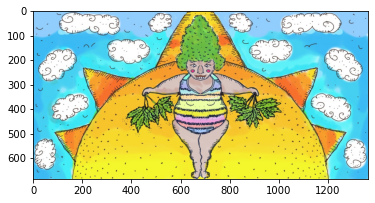

Descripción:  un niã±o pequeã±o en un traje de baã±o está de pie en un banco de la calle 


In [23]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from numpy import argmax
from keras.preprocessing.sequence import pad_sequences


# pre-define the max sequence length (from training)
max_length_try = max_length
# load and prepare the photograph
photo = extract_features('C:/Users/mario/Pictures/Makoma1.jpg')

img=mpimg.imread('C:/Users/mario/Pictures/Makoma1.jpg')
imgplot = plt.imshow(img)
plt.show()

# generate description
description = generate_desc(model, tokenizer, photo, max_length_try)
# Eliminar los tags de entrada y de salida
description = description.replace('startseq', '').replace('endseq', '')
# Manejo de acentos
description = description.replace('ã³', 'ó').replace('ã¡', 'á')
clear_description = description

for palabra in description.split():
    clear_description = clear_description.replace(palabra + ' ' + palabra, palabra)

print('Descripción: ' + clear_description)

## Inciso G) Evaluación BLEU del modelo

In [24]:
from nltk.translate.bleu_score import corpus_bleu
from IPython.display import clear_output

# evaluate the skill of the model
def evaluate_model(model, descriptions, photos, tokenizer, max_length):
    x = 0
    actual, predicted = list(), list()
    # Recorrer todo el set completo
    for key, desc_list in descriptions.items():
        x += 1
        clear_output(wait = True)
        print('Trabajando en : ' + str(x) + '/' + str(len(descriptions)))
        # Generar descripción
        yhat = generate_desc(model, tokenizer, photos[key], max_length)
        # store actual and predicted
        references = [d.split() for d in desc_list]
        actual.append(references)
        predicted.append(yhat.split())
            
    # calculate BLEU score, analisis por palabras bigramas o trigramas o cuatrigrams
    print('BLEU-1: %f' % corpus_bleu(actual, predicted, weights=(1.0, 0, 0, 0)))
    print('BLEU-2: %f' % corpus_bleu(actual, predicted, weights=(0.5, 0.5, 0, 0)))
    print('BLEU-3: %f' % corpus_bleu(actual, predicted, weights=(0.3, 0.3, 0.3, 0)))
    print('BLEU-4: %f' % corpus_bleu(actual, predicted, weights=(0.25, 0.25, 0.25, 0.25)))

In [25]:
features = dict()
# Cargar el archivo de características de las imágenes
def load_photo_features(filename, dataset):
    # Cargamos todas las características
    all_features = load(open(filename, 'rb'))
    # Filtramos las características
    for k in dataset:
        try:
            features[k] = all_features[k]
        except KeyError:
            True
    return features

In [26]:
# Extraemos las descripciones
test_descriptions = dict()
with open('descripciones_Espanol.txt', 'rb') as file:
    text = file.read()
    for desc in text.decode().split('\n'):
        Id = desc.split()[0]
        if Id not in test_descriptions:
            test_descriptions[Id] = list()
        test_descriptions[Id].append(desc.replace(desc.split()[0] + ' ', ''))

# Extraer las características de las fotos
all_features = load(open('features_Espanol_V2.pkl', 'rb'))


evaluate_model(model, test_descriptions, all_features, tokenizer, max_length)

Trabajando en : 8091/8091
BLEU-1: 0.400216
BLEU-2: 0.234742
BLEU-3: 0.151756
BLEU-4: 0.066535
